<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/notebooks/02-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

# Redes Neuronales MLP para clasificación

<img align="center" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/img/mlp.png?raw=1"/>

En esta notebook usaremos una red neuronal de tipo **MultiLayer Perceptron (MLP)** para el problema de clasificación en el dataset MNIST.

Al final, practicaremos el uso de estas redes para buscar un mejor modelo para esta tarea.

Benchmarks para el dataset MNIST

1. **No Routing Needed Between Capsules**, 2020. *Accuracy: 99.87%*

    Modelo de redes CNN con Homogeneous Vector Capsules (HVCs) que modifican el flujo de datos entre capas. [Artículo](https://arxiv.org/abs/2001.09136), [código](https://github.com/AdamByerly/BMCNNwHFCs).

2. **An Ensemble of Simple Convolutional Neural Network Models for MNIST Digit Recognition**, 2020. *Accuracy: 99.87%*

    Modelo de ensamble de redes CNN [Artículo](https://arxiv.org/abs/2008.10400), [código](https://github.com/ansh941/MnistSimpleCNN).

## 1. El conjunto de datos

Observar que, ahora sí, usamos todo el conjunto de datos completo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Hacemos una copia del 'y_test', la usaremos al final

11490434/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Visualizamos 6 ejemplos, junto con sus etiquetas

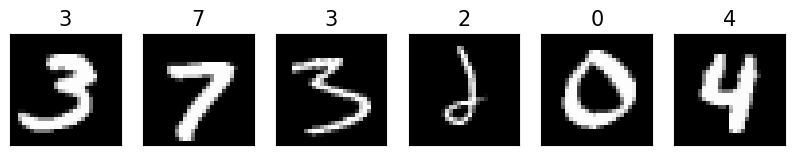

In [ ]:
# ------ Obtenemos algunos índices aleatorios:
some_idxs = np.random.choice(list(range(y_train.shape[0])),size=6,replace=False)

fig, axes = plt.subplots(ncols=6, sharex=False,
			 sharey=True, figsize=(10, 4))
for i,idx in enumerate(some_idxs):
	axes[i].set_title(y_train[idx],fontsize=15)
	axes[i].imshow(X_train[idx], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Definiendo la red

Al usar redes neuronales, usalmente el vector de etiquetas debe estar codificado como vectores **one-hot**. Es decir:

$$1 → (1,0,...,0) $$
$$2 → (0,1,...,0) $$
$$ ... $$

Entonces, las etiquetas $y$ son matrices de tamaño $N\times m$ donde

* $N$: número de instancias
* $m$: número de clases

Hacemos la codificación usando la función [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) de [keras](https://www.tensorflow.org/guide/keras).

In [ ]:
from tensorflow.keras.utils import to_categorical

print("---------- Antes de la codificación ----------")
print(f"Primeras 5 etiquetas: {y_train[:5]}")
print(f"Shape: {y_train.shape}")

y_train = to_categorical(y_train,num_classes=10)

print("---------- Después de la codificación ----------")
print(f"Primeras 5 etiquetas:\n{y_train[:5]}")
print(f"Shape: {y_train.shape}")

y_test = to_categorical(y_test,num_classes=10)

---------- Antes de la codificación ----------
Primeras 5 etiquetas: [5 0 4 1 9]
Shape: (60000,)
---------- Después de la codificación ----------
Primeras 5 etiquetas:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Shape: (60000, 10)


En TensorFlow las redes se definen a partir de los tipos de capas y elementos, de manera secuencial y por separado:

* **Dense**: implementa la operación: output = activation(dot(input, kernel) + bias) donde activation es la función de activación por elementos pasada como argumento de activación, kernel es una matriz de pesos creada por la capa, y bias es un vector de sesgo creado por la capa (sólo aplicable si use_bias es True).
* **Flatten**: Aplana los datos para tener un arreglo unidimensional.
* **Sequential**: Agrupa una secuencia de capas para formar un modelo.

In [ ]:
from keras.layers import Dense, Flatten #capas de neuronas,
from keras.models import Sequential

Definimos la arquitectura de la red neuronal. Observa la elección de:
* Activaciones
* Función de perdida
* Optimizador
* Métrica de desempeño

In [ ]:
model = Sequential() #tipo de modelo
model.add(Flatten(input_shape=(28,28))) #agregar cada clase de capa (aplanar datos), en este caso hay 1
model.add(Dense(8, activation='tanh')) # capa densa(h=8)
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida
#o=10 probabilidad de pertencia
model.summary()

model.compile(loss='categorical_crossentropy', #funcion de perdida o costo
	      optimizer='adam',#optimizador por default
	      metrics=['acc'] #metricas de rendimiento
		  )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


## Visualizamos la arquitectura de la red

Esto es opcional

A continuación se presentan dos maneras de visualizar la arquitectura de la red.

### 1. Usando visualkeras

In [ ]:
!pip install -q visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 52.5 MB/s eta 0:00:00


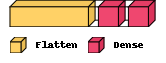

In [ ]:
from visualkeras import layered_view

layered_view(model,legend=True, draw_volume=True,draw_funnel=True)

### Usando `plot_model` de keras

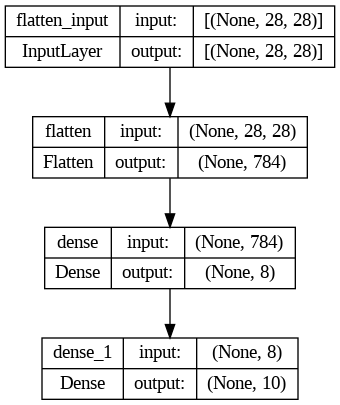

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

#none=cuantos arreglos va a producir la capa

## Entrenando la red

Entrenamos la red con el método `fit`, usamos 8 épocas

Observa que, para realizar el entrenamiento, usamos el conjunto de validación también. Este sirve para proporcionar un indicador no sesgado del desempeño del modelo.

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/img/training-validation-test.png?raw=1"/>

In [ ]:
n_epocas = 18 #ciclo de propagación directa, por cada salida mide el costo, para actualizar el costo
#brincos en la derivación para encontrar el min, descenso de gradiente
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

#en cada lote hace el descenso de gradiente

Epoch 1/18
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3572 - acc: 0.5375 - val_loss: 0.9888 - val_acc: 0.6717
Epoch 2/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8586 - acc: 0.7278 - val_loss: 0.7486 - val_acc: 0.7535
Epoch 3/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7665 - acc: 0.7585 - val_loss: 0.7653 - val_acc: 0.7655
Epoch 4/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7094 - acc: 0.7928 - val_loss: 0.7461 - val_acc: 0.7797
Epoch 5/18
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6845 - acc: 0.7992 - val_loss: 0.6821 - val_acc: 0.7940
Epoch 6/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6946 - acc: 0.7867 - val_loss: 0.7072 - val_acc: 0.7745
Epoch 7/18
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6628 - acc: 0.8037 - val_loss: 0.6583 - val_acc: 0.8074
Epoch 8/18
1875/1875 [==============================] - 6s 3ms

In [ ]:
history.history

Graficamos la función de perdida en cada época, tanto en el conjunto de entrenamiento, como en el de validación.

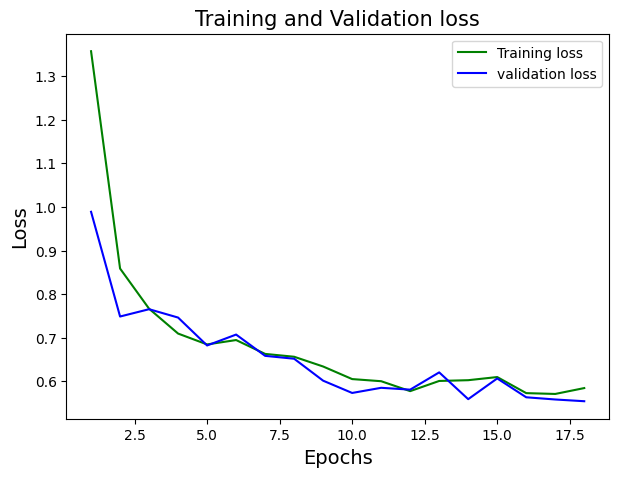

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

Ahora, graficamos el accuracy a lo largo del entrenamiento, tanto en el conjunto de entrenamiento como en el validación.

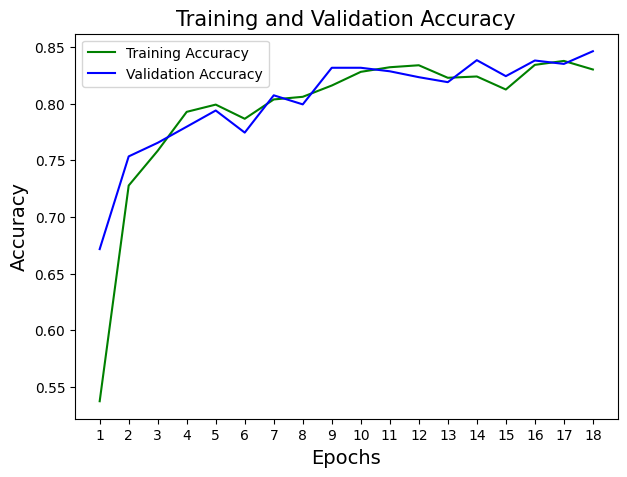

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

De la siguiente forma podemos acceder a la matriz de pesos y sesgos en cada capa. Las guardamos como arreglos de numpy. Son los pesos usados en la notebook anterior.

In [ ]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]

np.save("mnist_weights1.npy",first_layer_weights)
np.save("mnist_biases1.npy",first_layer_biases)

In [ ]:
second_layer_weights = model.layers[2].get_weights()[0]
second_layer_biases  = model.layers[2].get_weights()[1]

np.save("mnist_weights2.npy",second_layer_weights)
np.save("mnist_biases2.npy",second_layer_biases)

## Predicciones y rendimiento

¿Cómo se ven las predicciones?

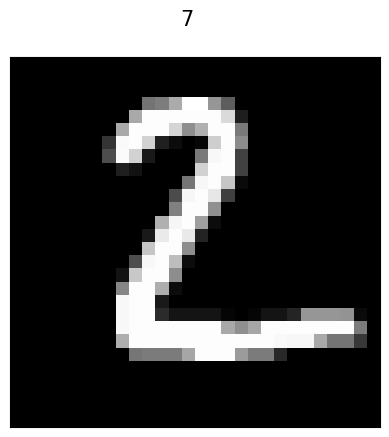

1/1 [==============================] - 0s 27ms/step

Salida de la red neuronal para este primer elemento:
 [[0.004 0.003 0.89  0.043 0.001 0.005 0.016 0.    0.038 0.   ]]

Son probabilidades, la suma de las entradas es 1.0000001192092896

Tomamos el índice de la entrada con mayor probabilidad: [2]


In [ ]:
x = X_test[1].copy() #numero de elemento a predecir

# ----- Graficamos este primer ejemplo de prueba:
plt.figure()
plt.suptitle(y_test_original[0],fontsize=15)
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# ----- Cambiamos a la forma adecuada para entrar a la red neuronal:
x_input = x.reshape(-1,x.shape[0],x.shape[1])

# ----- Lo pasamos por la red neuronal ya entrenada:
prediction = model.predict(x_input)
print(f"\nSalida de la red neuronal para este primer elemento:\n {np.round(prediction,3)}\n")

print(f"Son probabilidades, la suma de las entradas es {np.sum(prediction)}")
#probabilida maxima es el numero que aparecera
# ----- Tomamos el argmax:
prediction = np.argmax(prediction, axis=1)
print(f"\nTomamos el índice de la entrada con mayor probabilidad: {prediction}")

Obtenemos todas las predicciones sobre el conjunto de prueba:

In [ ]:
predictions_matrix = model.predict(X_test)
print(predictions_matrix.shape)
predictions = np.argmax(predictions_matrix, axis=1)

313/313 [==============================] - 1s 4ms/step
(10000, 10)


Visualizamos algunas predicciones

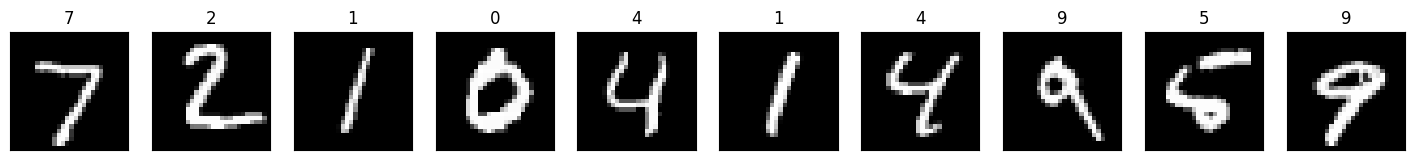

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(18, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Obtenemos las métricas de desempeño de la tarea de clasificación. Observar que ambas son **vectores** de etiquetas

In [ ]:
print(predictions.shape)
print(y_test_original.shape)

(10000,)
(10000,)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.8463
Test Recall: 0.844690672780365
Test Precision: 0.8511479776668816


Calculamos el roc-auc score

In [ ]:
from sklearn.metrics import roc_auc_score

print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)

Shape de y_test: (10000, 10)
Shape de las predicciones para el conjunto de prueba: (10000, 10)


0.9764994623261218

Mostramos la matriz de confusión

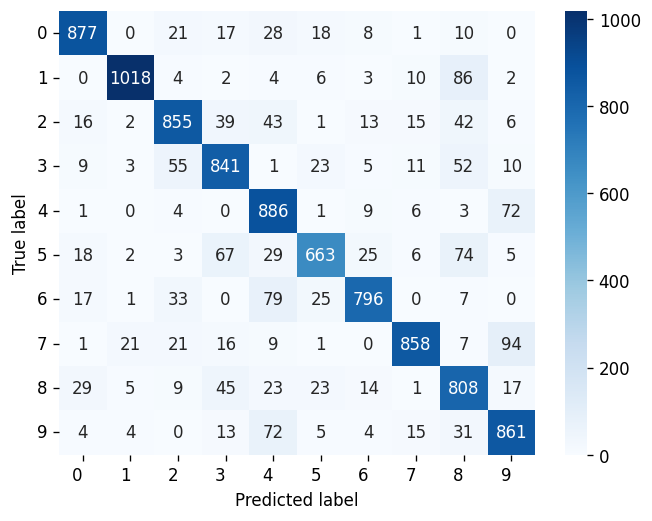

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)

⭕ ¿Qué dígitos son los que más confunde la red?
9 y 7

---

## ⭕ Práctica

Modifica el módelo de red neuronal MLP cambiando los siguientes hiperparámetros:
* Épocas

* Número de capas ocultas (prueba al menos con una y dos capas ocultas).
* Número de neuronas en cada capa oculta.
* Función de activación de la capa oculta.
* Optimizador.

**Objetivo:** Subir las métricas de desempeño: accuracy y roc-auc score.

Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist

In [ ]:
model = Sequential() #tipo de modelo
model.add(Flatten(input_shape=(28,28))) #agregar cada clase de capa (aplanar datos), en este caso hay 1

model.add(Dense(20, activation='relu'))  #numero de neuronas
model.add(Dense(20, activation='relu'))

model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida
#o=10, probabilidad de pertencia
model.summary()

model.compile(loss='categorical_crossentropy', #funcion de perdida o costo
	      optimizer='adam',#optimizador por default
	      metrics=['acc'] #metricas de rendimiento
		  )

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 20)                15700     
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dense_51 (Dense)            (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epocas = 18 #ciclo de propagación directa, por cada salida mide el costo, para actualizar el costo
#brincos en la derivación para encontrar el min, descenso de gradiente
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

#en cada lote hace el descenso de gradiente

Epoch 1/18
1875/1875 [==============================] - 8s 3ms/step - loss: 1.7586 - acc: 0.5424 - val_loss: 0.8988 - val_acc: 0.6725
Epoch 2/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8112 - acc: 0.7005 - val_loss: 0.7852 - val_acc: 0.7142
Epoch 3/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6940 - acc: 0.7378 - val_loss: 0.6446 - val_acc: 0.7494
Epoch 4/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6384 - acc: 0.7635 - val_loss: 0.6327 - val_acc: 0.7593
Epoch 5/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5394 - acc: 0.8162 - val_loss: 0.4914 - val_acc: 0.8425
Epoch 6/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4672 - acc: 0.8490 - val_loss: 0.4571 - val_acc: 0.8700
Epoch 7/18
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4242 - acc: 0.8732 - val_loss: 0.3940 - val_acc: 0.8863
Epoch 8/18
1875/1875 [==============================] - 6s 3ms

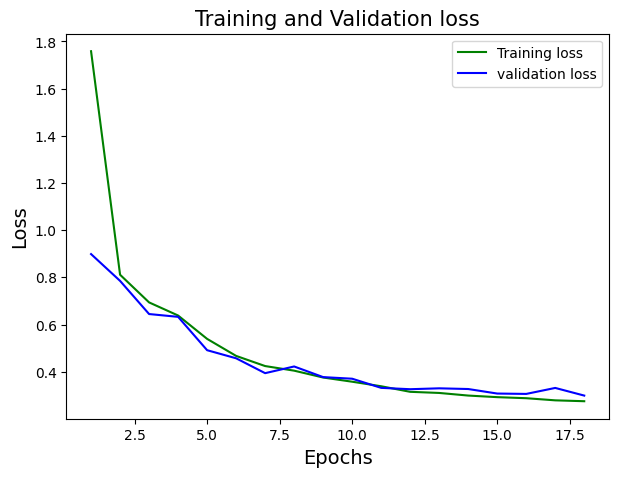

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

Ahora, graficamos el accuracy a lo largo del entrenamiento, tanto en el conjunto de entrenamiento como en el validación.

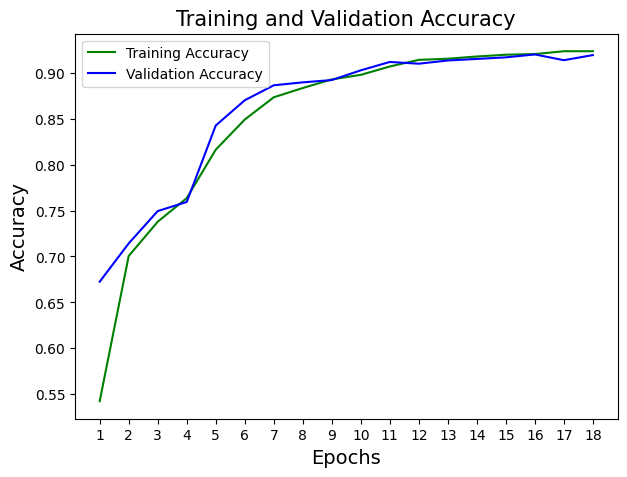

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

## Predicciones y rendimiento

¿Cómo se ven las predicciones?

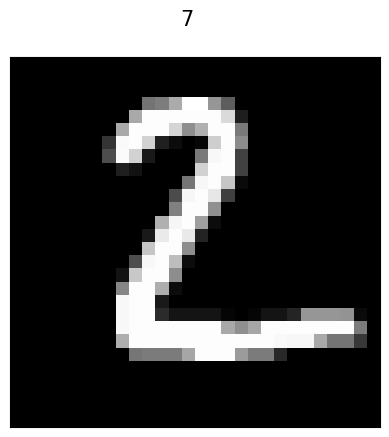

1/1 [==============================] - 0s 66ms/step

Salida de la red neuronal para este primer elemento:
 [[0.    0.009 0.985 0.003 0.    0.    0.    0.002 0.    0.   ]]

Son probabilidades, la suma de las entradas es 1.0

Tomamos el índice de la entrada con mayor probabilidad: [2]


In [ ]:
x = X_test[1].copy() #numero de elemento a predecir

# ----- Graficamos este primer ejemplo de prueba:
plt.figure()
plt.suptitle(y_test_original[0],fontsize=15)
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# ----- Cambiamos a la forma adecuada para entrar a la red neuronal:
x_input = x.reshape(-1,x.shape[0],x.shape[1])

# ----- Lo pasamos por la red neuronal ya entrenada:
prediction = model.predict(x_input)
print(f"\nSalida de la red neuronal para este primer elemento:\n {np.round(prediction,3)}\n")

print(f"Son probabilidades, la suma de las entradas es {np.sum(prediction)}")
#probabilida maxima es el numero que aparecera
# ----- Tomamos el argmax:
prediction = np.argmax(prediction, axis=1)
print(f"\nTomamos el índice de la entrada con mayor probabilidad: {prediction}")

Obtenemos todas las predicciones sobre el conjunto de prueba:

In [ ]:
predictions_matrix = model.predict(X_test)
print(predictions_matrix.shape)
predictions = np.argmax(predictions_matrix, axis=1)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


Visualizamos algunas predicciones

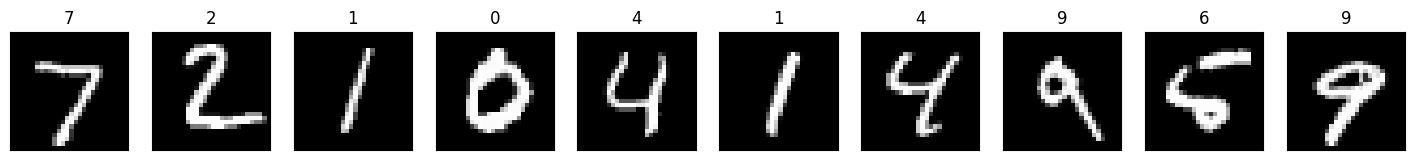

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(18, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Obtenemos las métricas de desempeño de la tarea de clasificación. Observar que ambas son **vectores** de etiquetas

In [ ]:
print(predictions.shape)
print(y_test_original.shape)

(10000,)
(10000,)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.9192
Test Recall: 0.917502788076429
Test Precision: 0.9179406887848524


Calculamos el roc-auc score

In [ ]:
from sklearn.metrics import roc_auc_score

print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)

Shape de y_test: (10000, 10)
Shape de las predicciones para el conjunto de prueba: (10000, 10)


0.9925913009834314

Mostramos la matriz de confusión

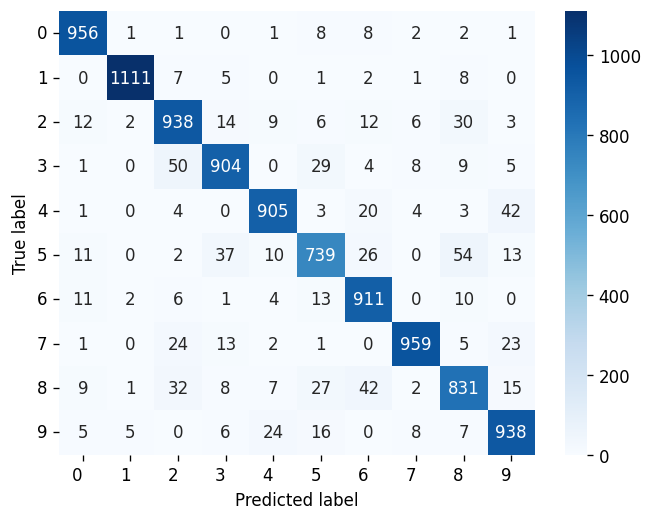

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)

##Mejores métricas

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 20)                15700     
                                                                 
 dense_53 (Dense)            (None, 20)                420       
                                                                 
 dense_54 (Dense)            (None, 20)                420       
                                                                 
 dense_55 (Dense)            (None, 20)                420       
                                                                 
 dense_56 (Dense)            (None, 20)                420       
                                                                 
 dense_57 (Dense)            (None, 20)              

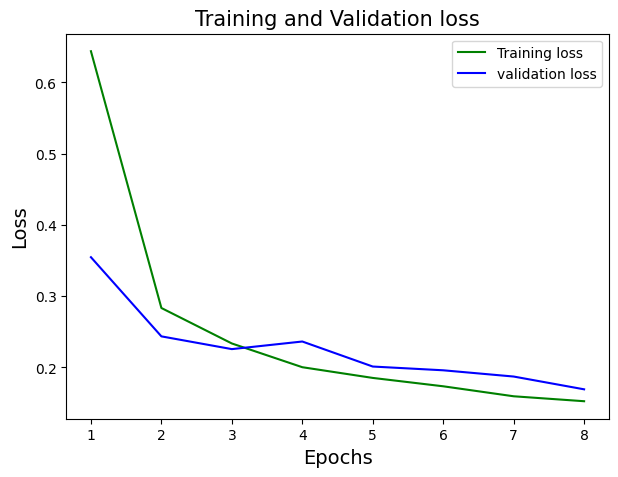

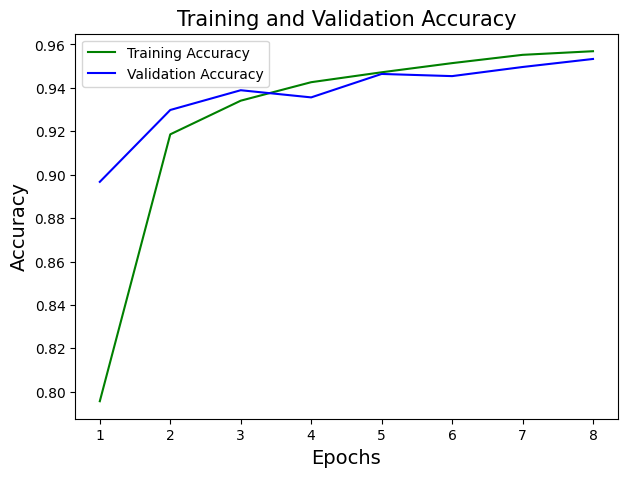

313/313 [==============================] - 1s 2ms/step
(10000, 10)
Test Accuracy: 0.9533
Test Recall: 0.9526664171735891
Test Precision: 0.95358444668971
Shape de y_test: (10000, 10)
Shape de las predicciones para el conjunto de prueba: (10000, 10)
roc au score: 0.9976175245495146


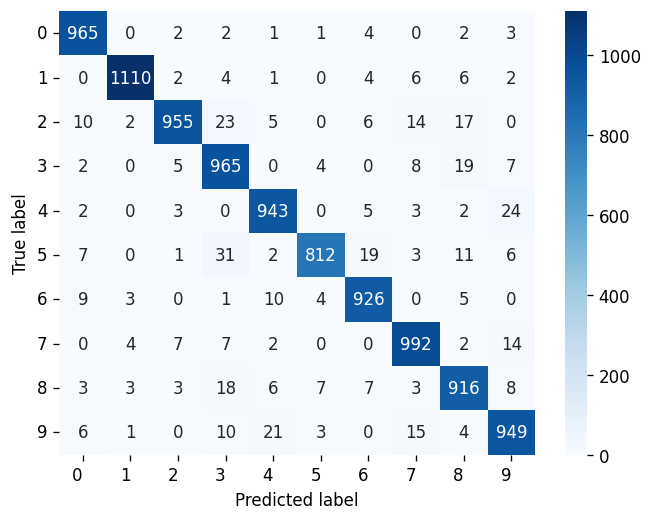

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

model.summary()

model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

n_epocas = 8

history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

predictions_matrix = model.predict(X_test)
print(predictions_matrix.shape)
predictions = np.argmax(predictions_matrix, axis=1)

from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

from sklearn.metrics import roc_auc_score

print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de las predicciones para el conjunto de prueba: {predictions_matrix.shape}")

roc_auc_score(y_test,predictions_matrix)
print("roc au score:", roc_auc_score(y_test,predictions_matrix))

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)